# Summer Olympics Data Analysis Assignment

### 1. In how many cities Summer Olympics is held so far?

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('summer.csv')

In [3]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [4]:
df['City']

0        Athens
1        Athens
2        Athens
3        Athens
4        Athens
          ...  
31160    London
31161    London
31162    London
31163    London
31164    London
Name: City, Length: 31165, dtype: object

In [5]:
len(df['City'].unique())

22

### 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [6]:
df2=df[df['Medal']=='Gold'].groupby(["Sport"])["Medal"].count().reset_index(name="Gold Medals").sort_values(by='Gold Medals', ascending=False).head()

In [7]:
df2.reset_index(level=0,drop=True,inplace=True)

In [8]:
df2.set_index('Sport' ,inplace=True)

In [9]:
df2

,Gold Medals
Sport,
Aquatics,1421
Athletics,1215
Rowing,890
Gymnastics,820
Fencing,552


<AxesSubplot:xlabel='Sport'>

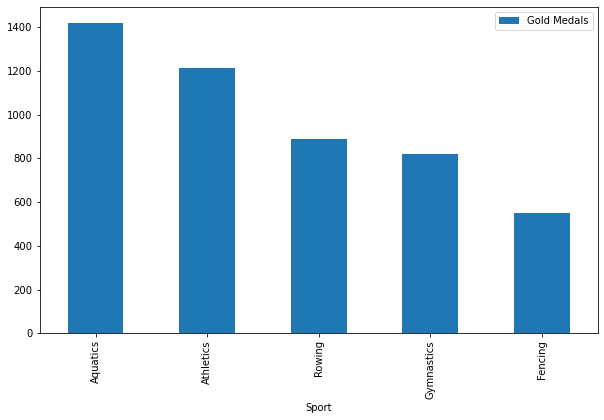

In [10]:
df2.plot.bar(figsize=(10,6))

### 3. Which sport is having most number of medals so far? (Top 5)

In [11]:
data=[]

for sport in df['Sport'].unique():
    data.append([sport, len(df[df['Sport'] == sport])])

In [12]:
data = pd.DataFrame(data, columns = ['Sport','Medals'])

In [13]:
data = data.sort_values(by='Medals', ascending=False).head()

In [14]:
data

,Sport,Medals
0,Aquatics,4170
1,Athletics,3638
17,Rowing,2667
4,Gymnastics,2307
3,Fencing,1613


<AxesSubplot:xlabel='Sport'>

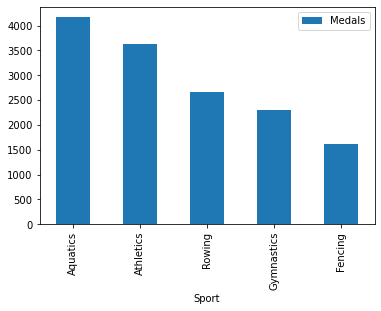

In [15]:
data.plot(x='Sport', y='Medals', kind='bar')

### 4. Which player has won most number of medals? (Top 5)

In [16]:
data=[]

for athlete in df['Athlete'].unique():
    data.append([athlete, len(df[df['Athlete'] == athlete])])

In [17]:
data = pd.DataFrame(data, columns = ['Athlete','Medals'])

In [18]:
data = data.sort_values(by='Medals', ascending=False).head()

In [19]:
data

,Athlete,Medals
18640,"PHELPS, Michael",22
7197,"LATYNINA, Larisa",18
9948,"ANDRIANOV, Nikolay",15
6591,"ONO, Takashi",13
5103,"MANGIAROTTI, Edoardo",13


<AxesSubplot:xlabel='Athlete'>

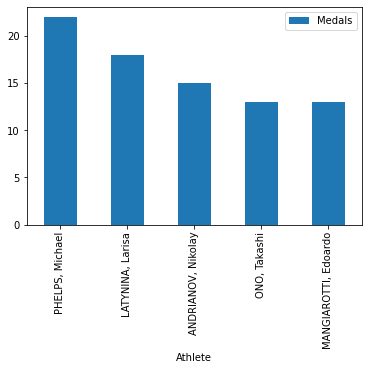

In [20]:
data.plot(x='Athlete', y='Medals', kind='bar')

### 5. Which player has won most number Gold Medals of medals? (Top 5)

In [21]:
df3=df[df['Medal']=='Gold'].groupby(["Athlete"])["Medal"].count().reset_index(name="Gold Medals").sort_values(by='Gold Medals', ascending=False).head()

In [22]:
df3

,Athlete,Gold Medals
5712,"PHELPS, Michael",18
4186,"LEWIS, Carl",9
5332,"NURMI, Paavo",9
6905,"SPITZ, Mark",9
4066,"LATYNINA, Larisa",9


<AxesSubplot:xlabel='Athlete'>

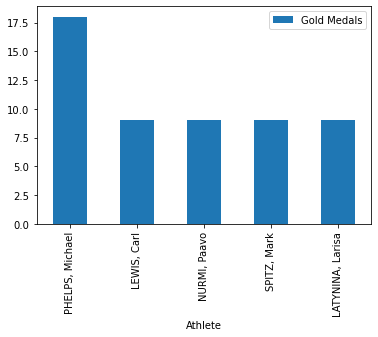

In [23]:
df3.plot(x='Athlete', y='Gold Medals', kind='bar')

### 6. In which year India won first Gold Medal in Summer Olympics?

In [24]:
ind = df[df['Country'] == 'IND']
ind[ind['Medal'] == 'Gold'].sort_values(by='Year', ascending=True).head(1)['Year']

5512    1928
Name: Year, dtype: int64

### 7. Which event is most popular in terms on number of players? (Top 5)

In [25]:
data=[]

for event in df['Event'].unique():
    data.append([event, len(df[df['Event'] == event])])

In [26]:
data = pd.DataFrame(data, columns = ['Event','Players'])

In [27]:
data = data.sort_values(by='Players', ascending=False).head()

In [28]:
data

,Event,Players
80,Football,1497
176,Hockey,1422
138,Team Competition,1147
327,Basketball,1012
337,Handball,973


<AxesSubplot:xlabel='Event'>

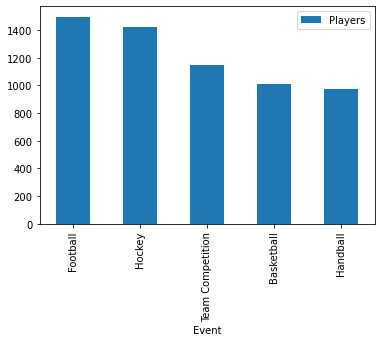

In [29]:
data.plot(x='Event', y='Players', kind='bar')

### 8. Which sport is having most female Gold Medalists? (Top 5)

In [30]:
df4 = df[df['Gender'] == 'Women']

In [31]:
df4 = df4[df4['Medal']=='Gold'].groupby(["Sport"])["Medal"].count().reset_index(name="Gold Medals").sort_values(by='Gold Medals', ascending=False).head()

In [32]:
df4

,Sport,Gold Medals
0,Aquatics,589
2,Athletics,389
13,Gymnastics,268
18,Rowing,217
27,Volleyball,166


<AxesSubplot:xlabel='Sport'>

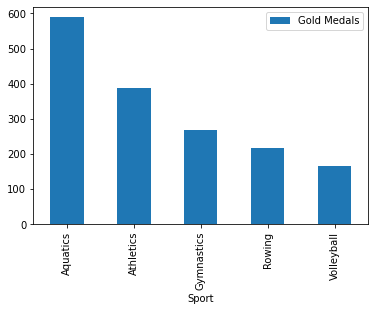

In [33]:
df4.plot(x='Sport', y='Gold Medals', kind='bar')